**Лабораторная 4. Линейная регрессия**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("/content/sample_data/california_housing_train.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


* Получите и визуализируйте статистику по датасету (включая количество, среднее значение, стандартное отклонение, минимум, максимум и различные квантили).



In [ ]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

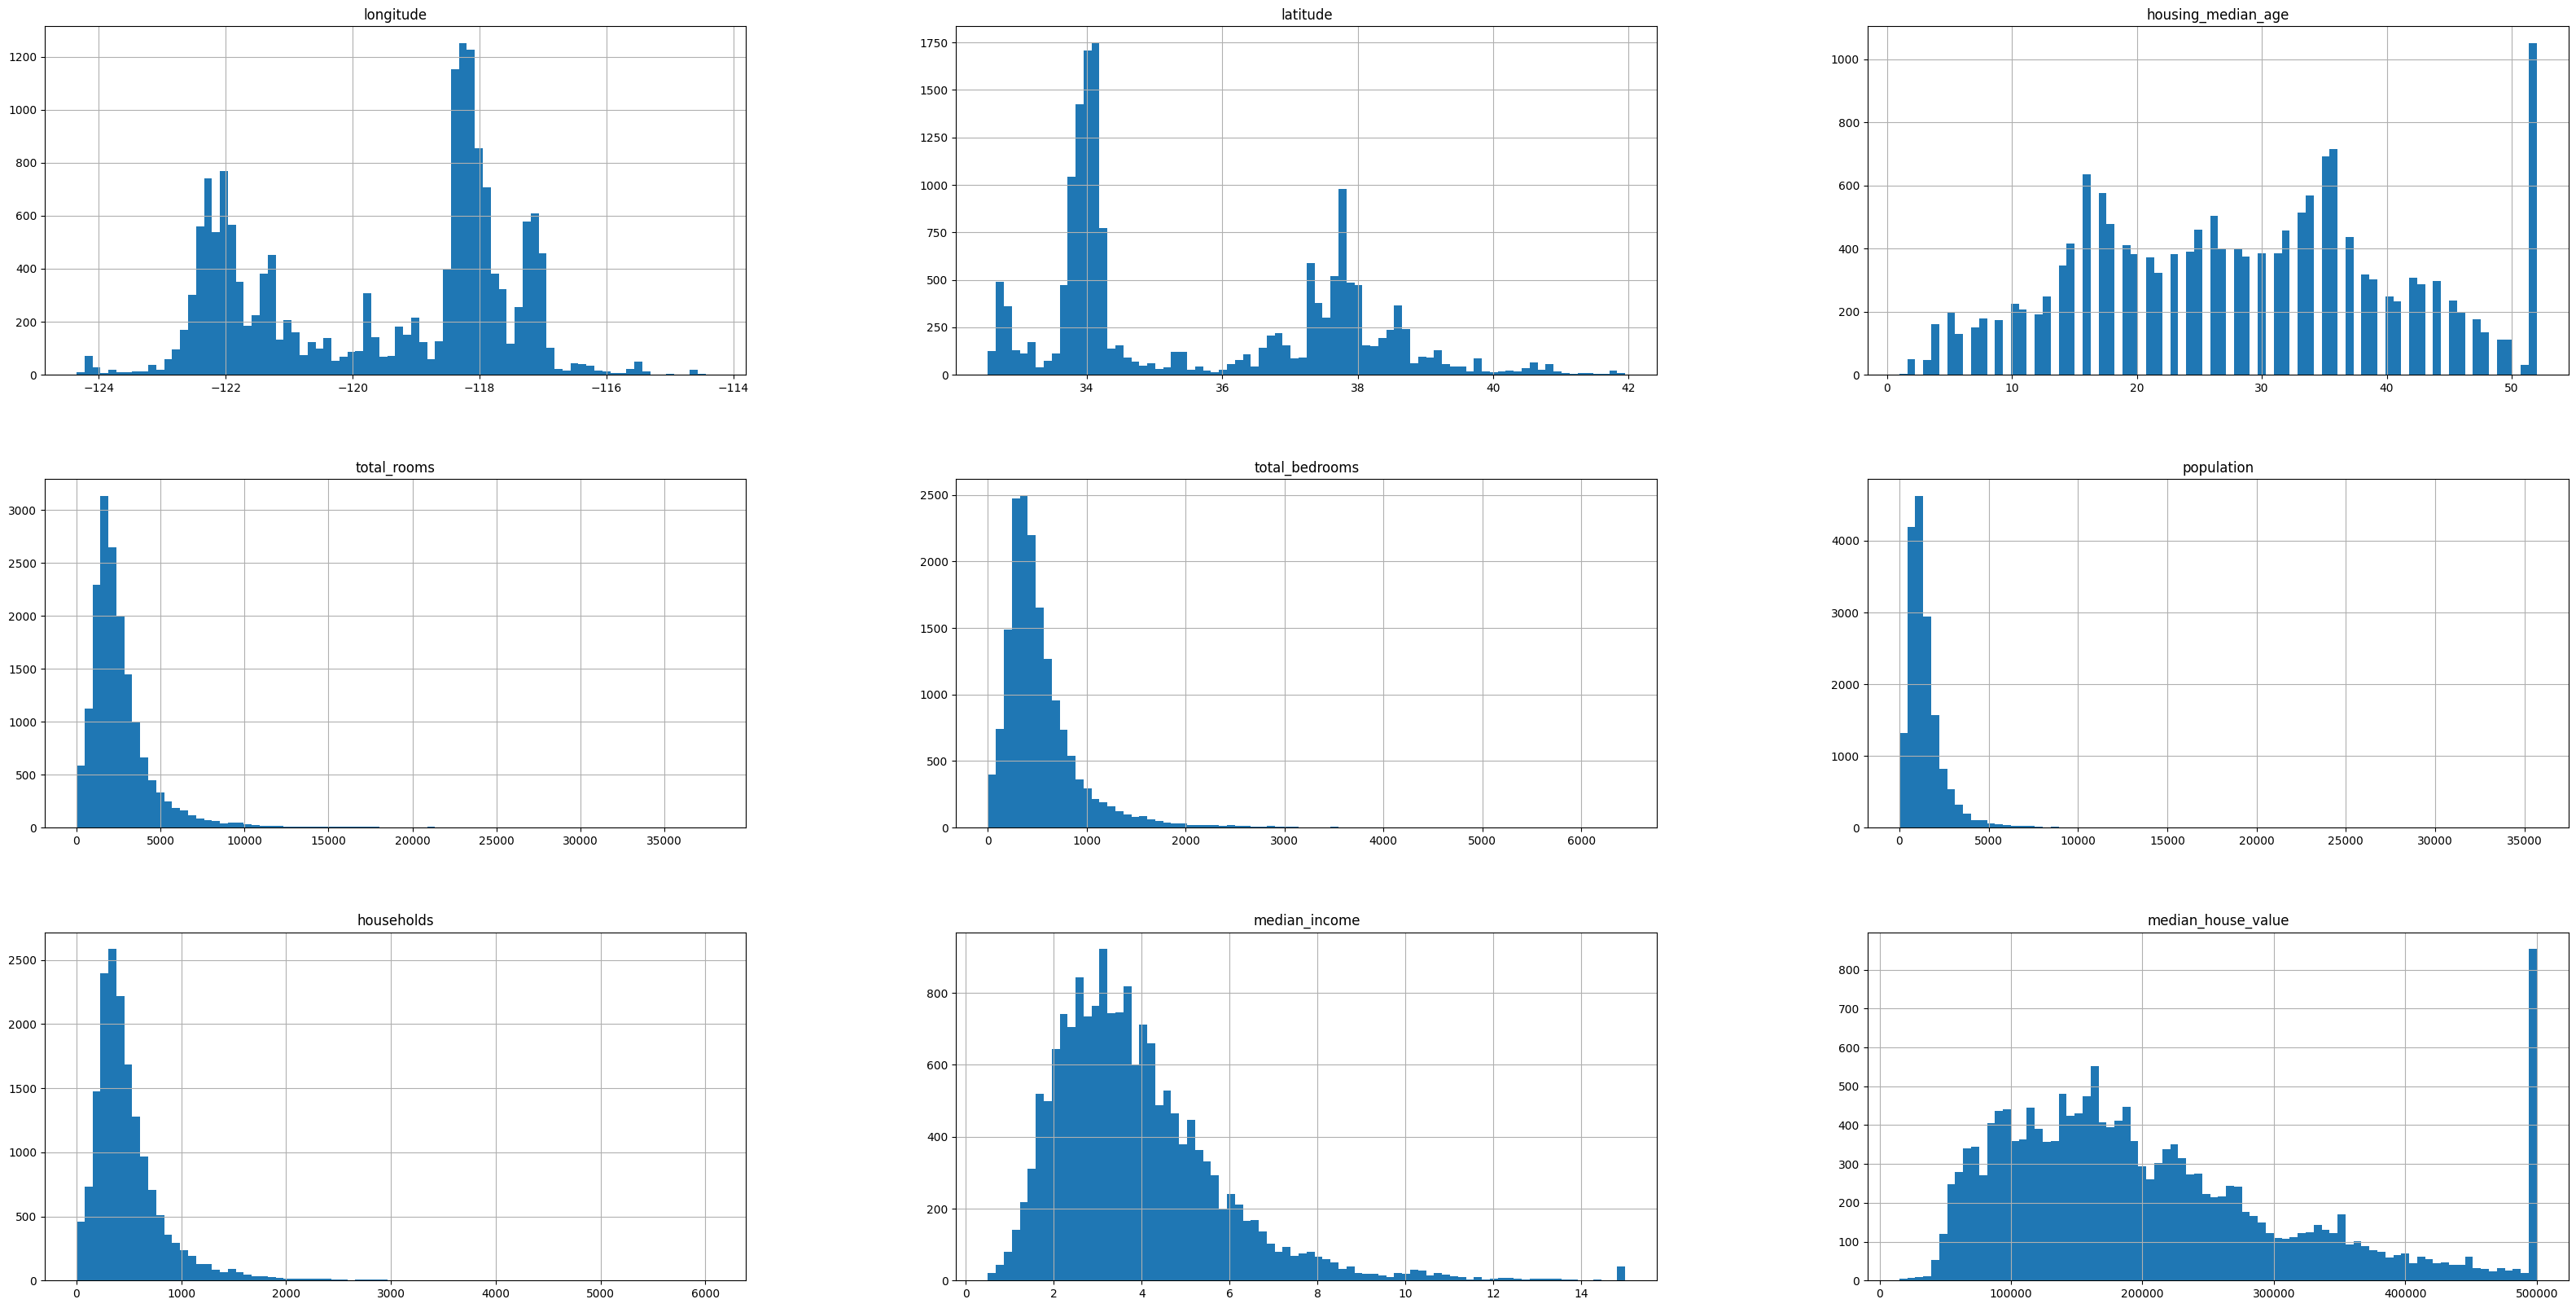

In [ ]:
data.hist(bins=80, figsize=(40, 20))

С данными у нас все хорошо, nullов нет

* Проведите предварительную обработку данных, включая обработку отсутствующих значений, кодирование категориальных признаков и нормировка.

проверка на пустые строки

In [ ]:
data.isna().values.any()

False

нормировка

In [ ]:
res_std = data.std()
res_mean = data.mean()
data = (data - res_mean)/res_std
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,2.619288,-0.671500,-1.079639,1.361655,1.764152,-0.361173,-0.075996,-1.252506,-1.210522
1,2.539494,-0.573248,-0.761850,2.296540,3.230346,-0.261858,-0.099401,-1.081451,-1.096713
2,2.494610,-0.905436,-0.920744,-0.882436,-0.866931,-0.955326,-0.999223,-1.170071,-1.048430
3,2.489623,-0.928830,-1.159087,-0.524171,-0.480216,-0.796769,-0.715753,-0.362590,-1.154480
4,2.489623,-0.961581,-0.682402,-0.545731,-0.506313,-0.701809,-0.622130,-1.026424,-1.222593
...,...,...,...,...,...,...,...,...,...
16995,-2.342894,2.318197,1.859916,-0.195722,-0.344985,-0.455262,-0.343862,-0.799975,-0.826848
16996,-2.347881,2.369663,0.588757,-0.135170,-0.027072,-0.205230,-0.094200,-0.715705,-1.106197
16997,-2.362842,2.907715,-0.920744,0.015292,-0.019955,-0.161670,-0.117606,-0.446650,-0.894099
16998,-2.362842,2.889000,-0.761850,0.012998,0.029868,-0.114626,-0.060392,-0.997758,-1.047568


* Разделите данные на обучающий и тестовый наборы данных.

In [ ]:
train = data.sample(frac=0.7, random_state=42)
test = data.drop(train.index)
x_train = train.drop('median_house_value', axis=1)
y_train = train['median_house_value']
x_test = test.drop('median_house_value', axis=1)
y_test = test['median_house_value']

* Реализуйте линейную регрессию с использованием метода наименьших квадратов без использования сторонних библиотек, кроме NumPy и Pandas (для использования коэффициентов использовать библиотеки тоже нельзя). Использовать минимизацию суммы квадратов разностей между фактическими и предсказанными значениями для нахождения оптимальных коэффициентов.

In [ ]:
def fit(x, y):
    ones = np.ones((x.shape[0], 1))
    x = np.concatenate((ones, x), axis=1)
    XTX = np.dot(x.T,x)
    XTY = np.dot(x.T,y)
    XTX_inv = np.linalg.inv(XTX)
    B = np.dot(XTX_inv, XTY)
    return B

def predict(x, b):
    ones = np.ones((x.shape[0], 1))
    x = np.concatenate((ones, x), axis=1)
    return np.dot(x, b)

def r2_score(y_pred, y):
    ss_res = np.sum((y - y_pred) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    r2 = 1 - ss_res / ss_tot
    return r2

1. Модель по всем признакам:

In [ ]:
b = fit(x_train, y_train)
y_pred = predict(x_test, b)
print("R² score:", r2_score(y_pred, y_test))

R² score: 0.6141999167864743


2. Модель при которой расположение не учитывается

In [ ]:
x_train = train.drop(['median_house_value', 'latitude', 'longitude'], axis=1)
y_train = train['median_house_value']
x_test = test.drop(['median_house_value', 'latitude', 'longitude'], axis=1)
y_test = test['median_house_value']

b = fit(x_train, y_train)
y_pred = predict(x_test, b)
print("R² score:", r2_score(y_pred, y_test))

R² score: 0.5480624076462496


3. Попробуем оставить только total_rooms и median_income



In [ ]:
x_train = train[['total_rooms', 'median_income']]
y_train = train['median_house_value']
x_test = test[['total_rooms', 'median_income']]
y_test = test['median_house_value']

b = fit(x_train, y_train)
y_pred = predict(x_test, b)
print("R² score:", r2_score(y_pred, y_test))

R² score: 0.47613044950468797


- Бонусное задание
    - Ввести синтетический признак при построении модели

In [ ]:
new_df = data
new_df['my_attribute'] = new_df['total_bedrooms'] / new_df['total_rooms'] # синтетический признак

res_std = new_df['my_attribute'].std()
res_mean = new_df['my_attribute'].mean()
new_df['my_attribute'] = (new_df['my_attribute'] - res_mean)/res_std

train = new_df.sample(frac=0.7, random_state=42)
test = new_df.drop(train.index)
x_train = train.drop(['median_house_value', 'total_bedrooms'], axis=1)
y_train = train['median_house_value']
x_test = test.drop(['median_house_value', 'total_bedrooms'], axis=1)
y_test = test['median_house_value']

b = fit(x_train, y_train)
y_pred = predict(x_test, b)
print("R² score:", r2_score(y_pred, y_test))

R² score: 0.6072798307296885


**Вывод:** В случае, когда мы отбрасывали какие-либо признаки наблюдается падение нашей оценки модели. В случае же применения всех данных нам параметров мы наблюдаем максимально возможные показатели. Вероятно требуется использовать все имеющиеся признаки и стараться не отбрасывать их, а для повышения оценки использовать другие методы.